In [64]:
import qrcode
import base64
from io import BytesIO
from PIL import Image
import pandas as pd
import numpy as np
import copy 
import PIL
import tkinter
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.colormasks import RadialGradiantColorMask
import copy
from pathlib import Path
from time import time

In [65]:
def generateQRSRC(sku):
    qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=3,
    border=0,
    )
    qr.add_data(sku)
    qr.make(fit=True)

    img = qr.make_image(fill_color="black", back_color="white") #of (image_factory=StyledPilImage, color_mask=RadialGradiantColorMask())
    im_file = BytesIO()
    img.save(im_file, format="JPEG")
    im_bytes = im_file.getvalue()
    im_b64 = base64.b64encode(im_bytes)

    img_source = f'data:image/jpeg;base64,{im_b64.decode("utf-8")}'
    return img_source

''
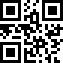

In [66]:
generateQRSRC('asdf')

In [67]:
df = pd.read_csv('./Vaulted Inventory & Consignment Management Verson.csv')
df.columns = [c.lower() for c in df.columns]
df['vintage'] = df['vintage'].astype(int).astype(str)

In [68]:
df

,company,vault,suffix,sku,producer,release,vintage,volume,size,qty,case,bin,alc
0,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2019,750 ml,6,10,"R1,650.00",9,15 % Vol
1,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2020,751 ml,6,10,"R1,650.01",9,16 % Vol
2,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2021,752 ml,6,10,"R1,650.02",9,17 % Vol
3,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2022,753 ml,6,10,"R1,650.03",9,18 % Vol
4,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2023,754 ml,6,10,"R1,650.04",9,19 % Vol
5,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2024,755 ml,6,10,"R1,650.05",9,20 % Vol
6,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2025,756 ml,6,10,"R1,650.06",9,21 % Vol
7,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2026,757 ml,6,10,"R1,650.07",9,22 % Vol
8,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2027,758 ml,6,10,"R1,650.08",9,23 % Vol
9,Vaulted Wine,Lourensford Vault,Powered by Fanfire,https://api.vaulted.wine/asset/lourensford/LOU...,Lourensford,Limited Release SMV,2028,759 ml,6,10,"R1,650.09",9,24 % Vol


In [69]:
with open('./template.html', 'r') as f:
    lines = f.readlines()
html = ''.join(lines)

In [70]:
template = """<h4>COMPANY_NAME</h4>
<img src="SOURCE_BASE64" style="float:right">
<h5>VAULT_NAME</h5>
<h5>PRODUCER</h5>
<h5>RELEASE, VINTAGE</h5>

<p style="float:right">Powered by <img src="https://www.google.com/s2/favicons?domain=fanfire.ai" style=”width:40px;height:20px;"> Fanfire</p>"""

In [71]:
items = []
for i, row in df.iterrows():
    item = copy\
    .deepcopy(template)\
    .replace("COMPANY_NAME", row['company'])\
    .replace("VAULT_NAME", row['vault'])\
    .replace("PRODUCER", row['producer'])\
    .replace("RELEASE", row['release'])\
    .replace("VINTAGE", row['vintage'])\
    .replace("SOURCE_BASE64", generateQRSRC(row['sku']))
    
    items.append(item)

In [72]:
run_dir = Path(str(time()))
run_dir.mkdir()
page_nr = 0 
page = copy.deepcopy(html)
for item_nr, item in enumerate(items):
    print(item_nr, page_nr) 
    page = page.replace(f'ITEM_{(item_nr%10)+1}_HTML', item)
    if (item_nr + 1) % 10 == 0:
        with open(run_dir/f'page-{page_nr}.html', 'w') as f:
            f.write(page)
        page_nr = page_nr + 1
        page = copy.deepcopy(html)
with open(run_dir/f'page-{page_nr}.html', 'w') as f:
    f.write(page)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 2
21 2
22 2
23 2
24 2
25 2
26 2
27 2
28 2
29 2
30 3
